This notebook will calculate the sensitivity of the GRAS 1/4" microphone (40BF). Using the B&K sound calibrator that plays a 1kHz tone at 94 and 114 dB SPL (re 20$\mu$Pa) I can now measure the sensitivity of the mic. 

We know from the tech specs that the FS of the Fireface 802 instrument port is 27dBu, while the XLR port is 16 dBu. This is important to keep in mind which measuring the sensitivity of the SMP and GRAS mics, as they were measured with different ports on channel 9. 


The GRAS webpage states that the sensit

In [1]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np 
import scipy.signal as signal 
import scipy.stats as stats
import soundfile as sf
from fullscale_calculations import * 

In [2]:
%matplotlib notebook

In [3]:
print(f'Notebook cell run at : {dt.datetime.now()}')

Notebook cell run at : 2021-04-26 18:15:46.286566


In [4]:
dB = lambda X: 20*np.log10(abs(X))
un_dB = lambda X: 10**(X/20.0)

rms = lambda X: np.sqrt(np.mean(np.square(X)))
dBrms = lambda X: dB(rms(X))
    
def get_peak_2_peak(X):
    return np.max(X)-np.min(X)
def db_p2p_re2(X):
    return dB(get_peak_2_peak(X)/2.0)

In [5]:
u = np.random.normal(0,1,10)

In [6]:
u

array([ 0.41791274, -0.19935249,  0.18152211,  1.27933278, -0.26289446,
       -0.26694403,  1.06730165, -0.48098292,  1.7286306 ,  0.67209817])

In [7]:
gras_gain = 46 #dB 

In [8]:
# load the signal tone `recording 

audio, fs = sf.read('2021-04-22/gras_gaindB_46_94-114dBSPL_0_2021-04-22_15-08-24.wav')
b,a = signal.butter(2, np.array([100,5000])/(fs*0.5),'bandpass')
audio_lp = signal.filtfilt(b,a,audio)

tone_parts = [ audio_lp[int(0.1*fs):int(4.6*fs)], audio_lp[int(8.1*fs):int(12.4*fs)] ]


<IPython.core.display.Javascript object>


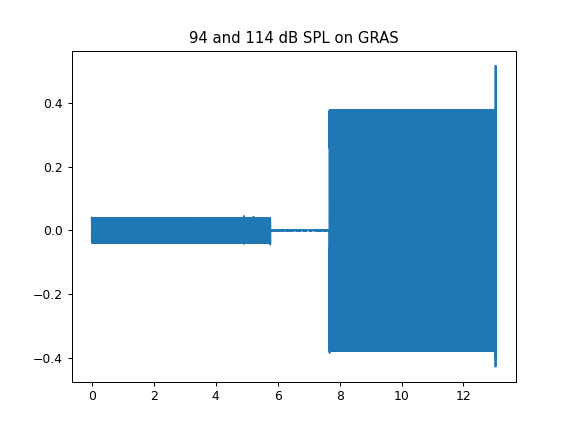

Text(0.5, 1.0, '94 and 114 dB SPL on GRAS')

In [9]:
plt.figure()
plt.plot(np.linspace(0,audio.size/fs,audio.size),audio_lp)
plt.title('94 and 114 dB SPL on GRAS')

In [10]:
dBrms(tone_parts[0])

-31.469128878774168

In [11]:
1/np.sqrt(2)

0.7071067811865475

In [12]:
tone_rms = np.array([rms(each) for each in tone_parts])
tone_dbrms = dB(tone_rms/(1/np.sqrt(2)))# re 1/sqrt(2) - as this corresponds to peak value of 1
tone_dbrms

array([-28.45882892,  -8.45263429])

In [13]:
tone_dbpp = np.array([db_p2p_re2(each) for each in tone_parts])
tone_dbpp

array([-28.11999643,  -8.45008098])

In [14]:
print( 10**(tone_dbrms/20.0),10**(tone_dbpp/20.0))

[0.03776231 0.37789251] [0.03926451 0.37800361]


In [15]:
actual_dbpp = tone_dbpp - gras_gain 
actual_dbpp

array([-74.11999643, -54.45008098])

In [16]:
actual_dbrms = tone_dbrms - gras_gain
actual_dbrms

array([-74.45882892, -54.45263429])

So, if the FS is 27 dBu (17.35 Vrms, 49 Vp2p), then the current readings are: 

In [17]:
fs_dbvrms = dB(dbu2vrms(27)) # Vrms re 1V
fs_dbvrms

24.786034050126208

In [18]:
fs_dbvpp = dB(dbu2vp2p(27))
fs_dbvpp

33.81693392004564

In [19]:
dB(dbu2vrms(27)) + actual_dbrms

array([-49.67279487, -29.66660024])

In [20]:
actual_Vpp_levels = dB(dbu2vp2p(27)) + actual_dbpp # re 1Vpp
actual_Vpp_levels

array([-40.30306251, -20.63314706])

In [21]:
playbacks_Vpp = 10**((dB(dbu2vp2p(27)) + actual_dbpp)/20.0)
playbacks_Vpp # in Vpp

array([0.0096571 , 0.09296996])

In [22]:
playbacks_Vrms = 10**( (fs_dbvrms + actual_dbrms)/20.0)
playbacks_Vrms

array([0.00328368, 0.03286018])

In [23]:
vrms2vp2p(10**(-49.17/20.0))

0.009841130559241589

In [24]:
vpp2rms(un_dB(actual_Vpp_levels))

array([0.0034143 , 0.03286984])

### How well do my measurements match the DAKK calibration measurements?
![](imgs/dakk_calibration_screenshot.PNG)

In [25]:
calibrated_dbVrms = -49.17 # dB re 1Vrms/Pa
obtained_dbVrms = fs_dbvrms + actual_dbrms[0]

msmt_error = calibrated_dbVrms-obtained_dbVrms
print(msmt_error)

0.5027948720081525


In [26]:
un_dB(calibrated_dbVrms) - un_dB(obtained_dbVrms)

0.0001956893968205445

My measurement had an error of 0.5dB, which is not bad at all. This is ~5% error, or in absolute terms, a difference of 196 $\mu$V/Pa

Given that my approach is now fairly close to what is expected, I'm now confident in my understanding of the calculations and hardware settings.  I will now proceed to just use the DAKK measurements of -49.17dBV/Pa (re 1Vrms) as it is a far more controlled setup and procedure.

In [27]:
print(f'Notebook cell run at : {dt.datetime.now()}')

Notebook cell run at : 2021-04-26 18:15:47.019664
